In [1]:
import os
path = 'C:\\vsCode\\git\\VTC_PYTHON_04\\Data\\BigMartSales Prediction\\'

os.path.isdir(path)
os.listdir(path)
os.chdir(path) # change path to root directory

In [2]:
# Dự đoán sức mua của siêu thị - Problem solving

import pandas as pd
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

print(train.shape, test.shape)
print(train.index) # dánh sach chỉ số
print(train.columns) # danh sách cột

(8523, 12) (5681, 11)
RangeIndex(start=0, stop=8523, step=1)
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [3]:
display(train.head(5))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
import numpy as np

display(train.head(5))
print(np.unique(train["Item_Fat_Content"]))
print(np.unique(train["Item_Type"]))
print(train["Outlet_Size"].unique())
print(np.unique(train["Outlet_Location_Type"]))
print(np.unique(train["Outlet_Type"]))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


['LF' 'Low Fat' 'Regular' 'low fat' 'reg']
['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods']
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 2' 'Tier 3']
['Grocery Store' 'Supermarket Type1' 'Supermarket Type2'
 'Supermarket Type3']


In [5]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

df = train.copy()
for column in df.columns:
    if(is_string_dtype(df[column])):
        freqDF = df[column].value_counts()
        display(freqDF.head(10))
        print("**"*30)
    else:
        minV = df[column].min()
        maxV = df[column].max()
        print(f"Column {column} has min : {minV} and max : {maxV}")
        print("**"*30)


FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
Name: Item_Identifier, dtype: int64

************************************************************
Column Item_Weight has min : 4.555 and max : 21.35
************************************************************


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

************************************************************
Column Item_Visibility has min : 0.0 and max : 0.328390948
************************************************************


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Name: Item_Type, dtype: int64

************************************************************
Column Item_MRP has min : 31.29 and max : 266.8884
************************************************************


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

************************************************************
Column Outlet_Establishment_Year has min : 1985 and max : 2009
************************************************************


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

************************************************************


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

************************************************************


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

************************************************************
Column Item_Outlet_Sales has min : 33.29 and max : 13086.9648
************************************************************


In [6]:
statDf= train.describe(include="all") 
display(statDf.T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
test.isnull() # Kiểm tra giá trị NULL

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5676,False,False,False,False,False,False,False,False,False,False,False
5677,False,False,False,False,False,False,False,False,False,False,False
5678,False,False,False,False,False,False,False,False,True,False,False
5679,False,False,False,False,False,False,False,False,True,False,False


In [8]:
train.isnull().sum() # đếm tổng số thiếu, => xử lý bằng mean , mode, median. ++ Missing vlue

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#filling null values with mean/mode/median
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())
train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode().iloc[0])
test.Item_Weight = test.Item_Weight.fillna(test.Item_Weight.mean())
test.Outlet_Size = test.Outlet_Size.fillna(test.Outlet_Size.mode().iloc[0])

In [12]:
train.isnull().sum() 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
train.Item_Fat_Content.value_counts() # Dữ liệu không chính xác

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('low fat', 'Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('LF', 'Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('reg', 'Regular')

test.Item_Fat_Content = test.Item_Fat_Content.str.replace('low fat', 'Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('LF', 'Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('reg', 'Regular')

In [17]:
train.Item_Fat_Content.value_counts() # Dữ liệu không chính xác

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

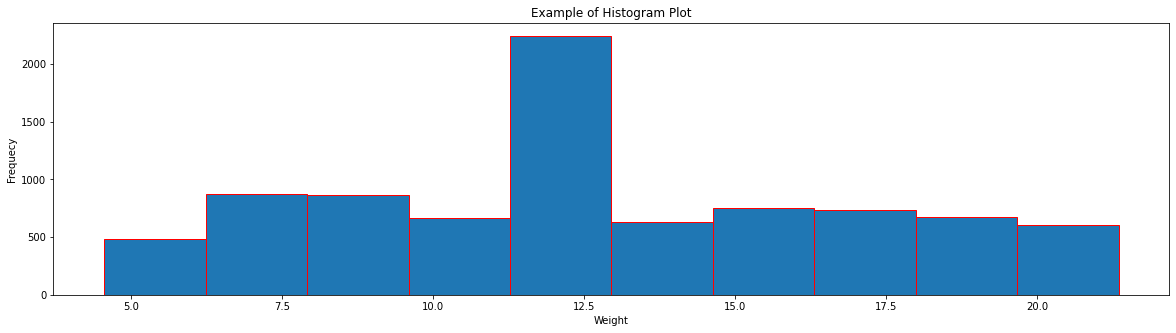

In [18]:
import matplotlib.pyplot as plt
# Plot the distribution of numpy data
train.Item_Weight.plot(kind='hist', edgecolor='red', figsize=(20,5))
 
# Add axis labels
plt.xlabel("Weight")
plt.ylabel("Frequecy")
plt.title("Example of Histogram Plot")
 
plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

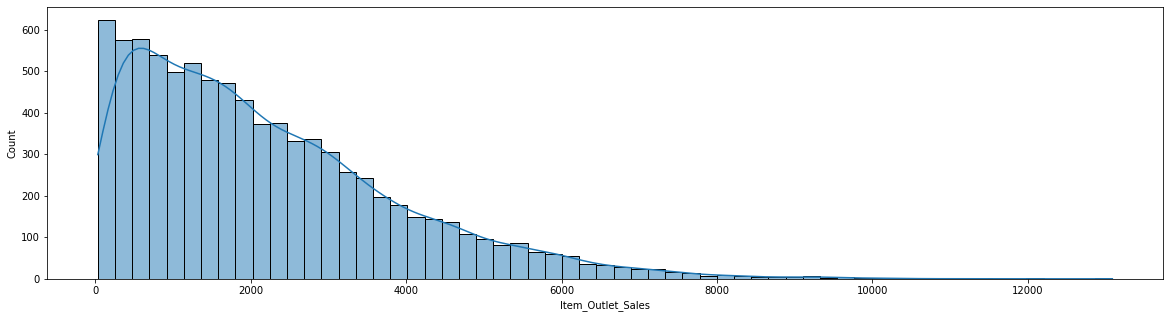

In [22]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.histplot(train["Item_Outlet_Sales"], kde = True)


<AxesSubplot:xlabel='count', ylabel='Item_Type'>

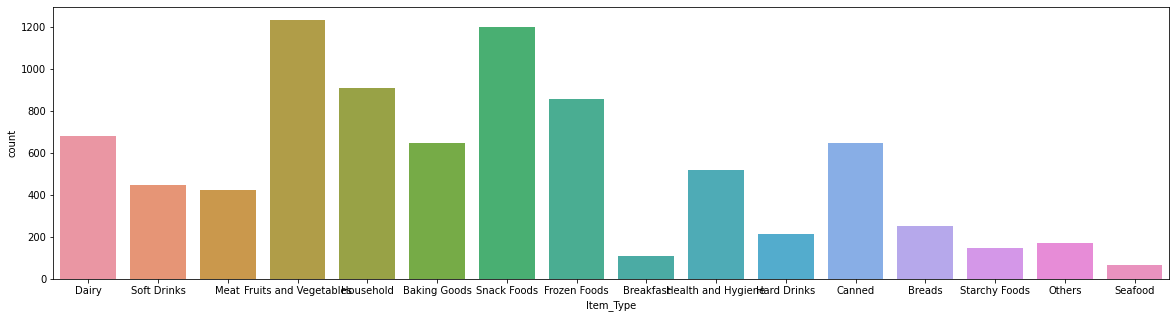

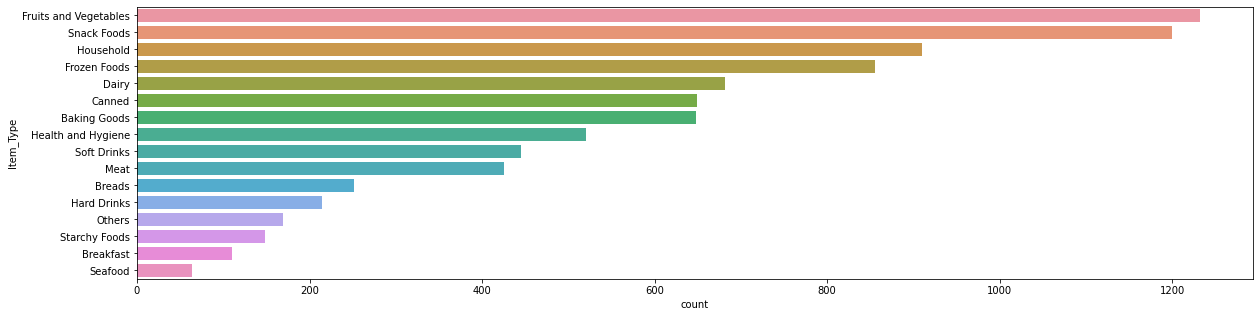

In [24]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.countplot(x='Item_Type',data=train) # => y = frequency

plt.figure(figsize=(20,5))
sns.countplot(y='Item_Type',data=train,order = train['Item_Type'].value_counts().index) # x = frequency

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

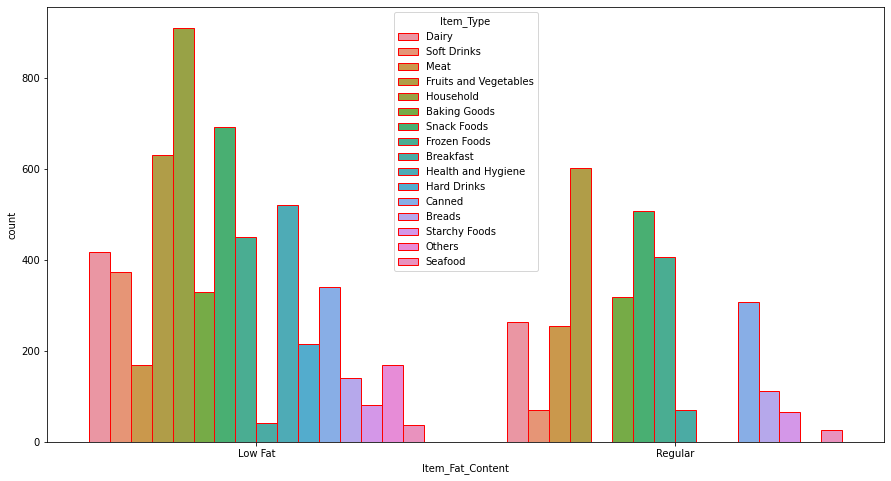

In [28]:
import seaborn as sns
plt.figure(figsize=(15,8))

sns.countplot(x="Item_Fat_Content",hue="Item_Type",data=train, edgecolor = 'red') # Hue là chiếu muốn so sánh

<AxesSubplot:>

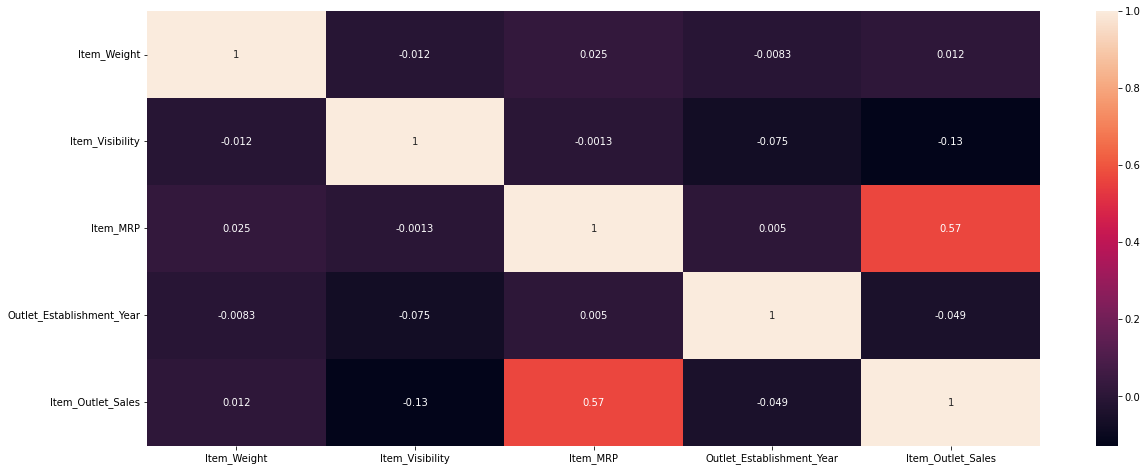

In [31]:
plt.figure(figsize=(20,8))
sns.heatmap(train.corr(), annot= True)

In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() # Mã hóa
le.fit(train["Item_Fat_Content"]) # Chỉ fit 1 lân trên train rồi apply cho test //TODO
train["Item_Fat_Content_Encoder"] = le.transform(train["Item_Fat_Content"])
test["Item_Fat_Content_Encoder"] = le.transform(test["Item_Fat_Content"])


In [35]:
x_train = train[["Item_Weight", "Item_Fat_Content_Encoder", "Item_MRP"]]
x_test = test[["Item_Weight", "Item_Fat_Content_Encoder", "Item_MRP"]]
y_train = train["Item_Outlet_Sales"]

In [43]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train, y_train)

KNeighborsRegressor()

In [44]:
y_pred = neigh.predict(x_train)
PredictDF = train.copy()
PredictDF["Item_Outlet_Sales_Predict"] = y_pred

In [45]:
display(PredictDF.head(20))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Encoder,Item_Outlet_Sales_Predict
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,5031.58376
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1,755.54984
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,1935.88008
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,1,2476.64284
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,822.92880
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,1,698.29104
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,1,459.00252
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,0,1817.76716
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,1,1401.90848
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,1,2861.60840
